In [85]:
# NLP Sentiment Analysis - Abilify Reviews

# 📦 Étape 1 : Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import kagglehub
import kagglehub
import zipfile
import os

# lexique
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [86]:
# 📂 Étape 2 : Chargement des données

# 1. Télécharger le dataset (le fichier ZIP)
csv_file = kagglehub.dataset_download("joyshil0599/abilify-oral-reviews-dataset")
print("ZIP file downloaded at:", csv_file)
print(csv_file)
df = pd.read_csv('/kaggle/input/abilify-oral-reviews-dataset/abilify_ora_effected_peple_reviewl.csv', encoding='latin1', on_bad_lines='skip',  header=0)
df.head()

ZIP file downloaded at: /kaggle/input/abilify-oral-reviews-dataset
/kaggle/input/abilify-oral-reviews-dataset


,Time of Meditation,Suspect name,Age,Gender,Suspect Status,Date,Condition,overall-rating,description-text
0,2 to less than 5 years,Barbara,65-74,Female,Patient,2/13/2023,Bipolar Disorder in Remission,5.0,I've taken Abilify to augment bupropion for Bi...
1,1 to 6 months,Matt,35-44,Male,Patient,2/9/2023,Schizophrenia,2.0,Worked for 3 months. Waste of time. You think ...
2,1 to 6 months,Alex Adams,25-34,Male,Patient,1/5/2023,Schizophrenia,2.3,Worked really well for like 2 months then I go...
3,1 to less than 2 years,Jill,35-44,Female,Patient,12/28/2022,Additional Medications to Treat Depression,1.0,This is the worst drug on the market. It cause...
4,1 to 6 months,Anonymous,45-54,Female,Patient,12/7/2022,Additional Medications to Treat Depression,2.0,I was prescribed as a child at 15 years old. I...


In [87]:
# 🧹 Étape 3 : Nettoyage du texte
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])
    return text

# Appliquer sur la colonne des commentaires (description-text)
df['clean_review'] = df['description-text'].apply(clean_text)
df['Gender'] = df['Gender'].apply(clean_text)

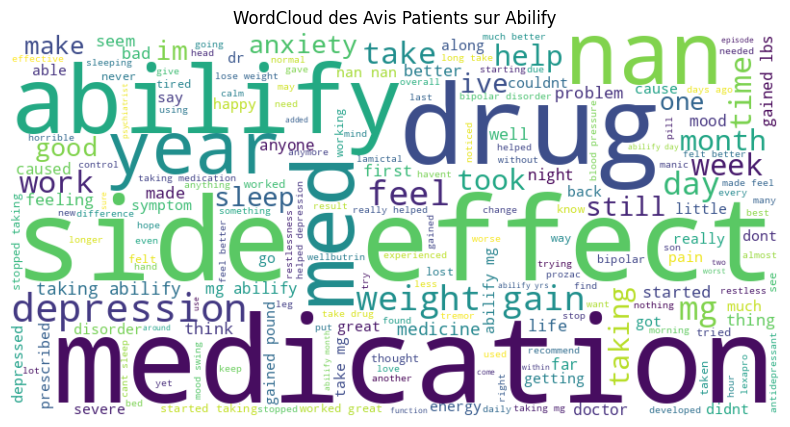

In [88]:
# 📊 Étape 4 : WordCloud des mots fréquents
all_words = " ".join(df['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud des Avis Patients sur Abilify")
plt.show()


In [89]:
# 🔍 Étape 5 : Analyse de sentiment (VADER)
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Catégorisation simple
def get_sentiment(score):
    if score >= 0.05:
        return "Positif"
    elif score <= -0.05:
        return "Négatif"
    else:
        return "Neutre"

df['sentiment'] = df['sentiment_score'].apply(get_sentiment)
df.head()

,Time of Meditation,Suspect name,Age,Gender,Suspect Status,Date,Condition,overall-rating,description-text,clean_review,sentiment_score,sentiment
0,2 to less than 5 years,Barbara,65-74,female,Patient,2/13/2023,Bipolar Disorder in Remission,5.0,I've taken Abilify to augment bupropion for Bi...,ive taken abilify augment bupropion bipolar di...,0.7510,Positif
1,1 to 6 months,Matt,35-44,male,Patient,2/9/2023,Schizophrenia,2.0,Worked for 3 months. Waste of time. You think ...,worked months waste time think better like tak...,0.2344,Positif
2,1 to 6 months,Alex Adams,25-34,male,Patient,1/5/2023,Schizophrenia,2.3,Worked really well for like 2 months then I go...,worked really well like months got restlessnes...,0.2286,Positif
3,1 to less than 2 years,Jill,35-44,female,Patient,12/28/2022,Additional Medications to Treat Depression,1.0,This is the worst drug on the market. It cause...,worst drug market caused gain pounds developed...,-0.3802,Négatif
4,1 to 6 months,Anonymous,45-54,female,Patient,12/7/2022,Additional Medications to Treat Depression,2.0,I was prescribed as a child at 15 years old. I...,prescribed child years old caused muscle spasm...,-0.7906,Négatif


<ipython-input-90-323a00c94080>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


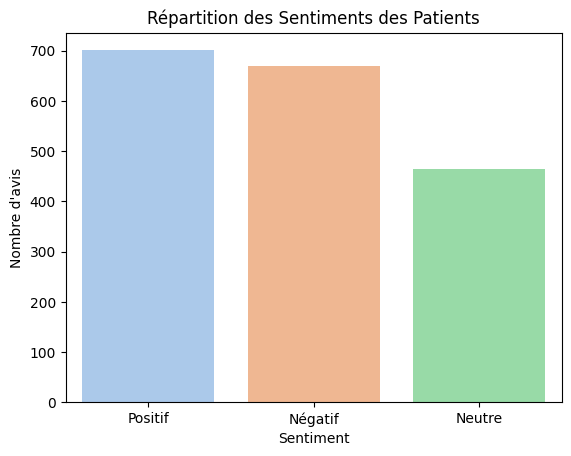

In [90]:
# 📈 Étape 6 : Visualisation des sentiments
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Répartition des Sentiments des Patients")
plt.xlabel("Sentiment")
plt.ylabel("Nombre d'avis")
plt.show()

In [91]:
df = df.rename(columns={' Condition': 'Condition'})

<ipython-input-92-5eaac0f0c7be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=df['Condition'], order=df['Condition'].value_counts().head(10).index, palette='Set2')


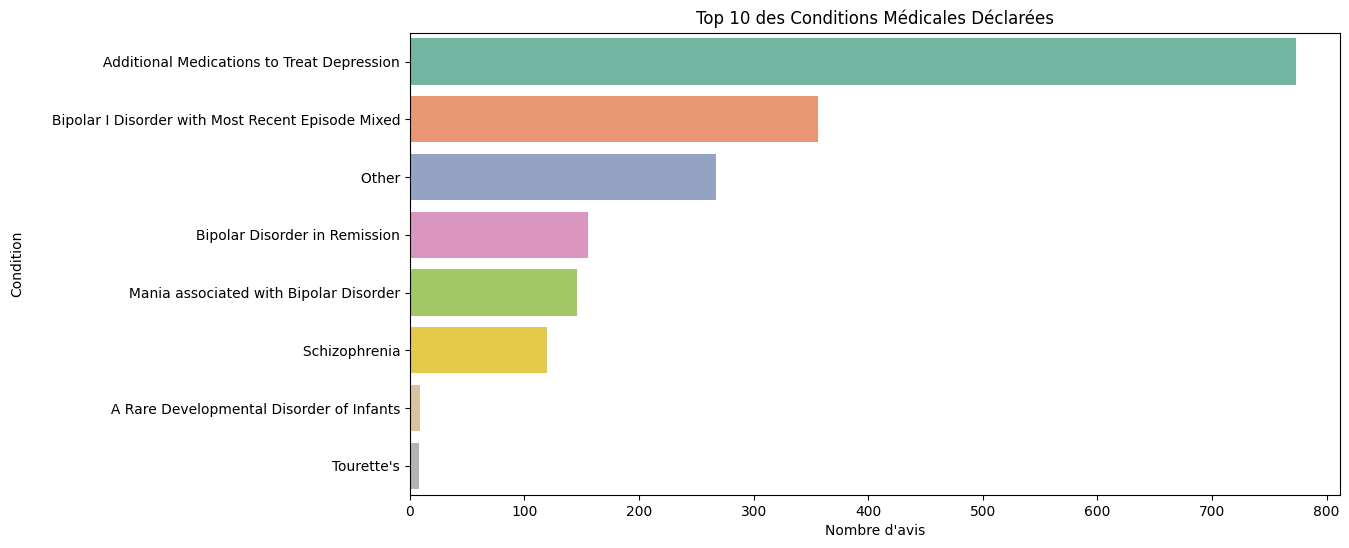

In [92]:
# 📈 Étape 7 : Répartition par condition
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y=df['Condition'], order=df['Condition'].value_counts().head(10).index, palette='Set2')
plt.title("Top 10 des Conditions Médicales Déclarées")
plt.xlabel("Nombre d'avis")
plt.ylabel("Condition")
plt.show()

<ipython-input-93-000d2eb582bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfNegatif, y=dfNegatif['Condition'], order=dfNegatif['Condition'].value_counts().head(10).index, palette='Set2')


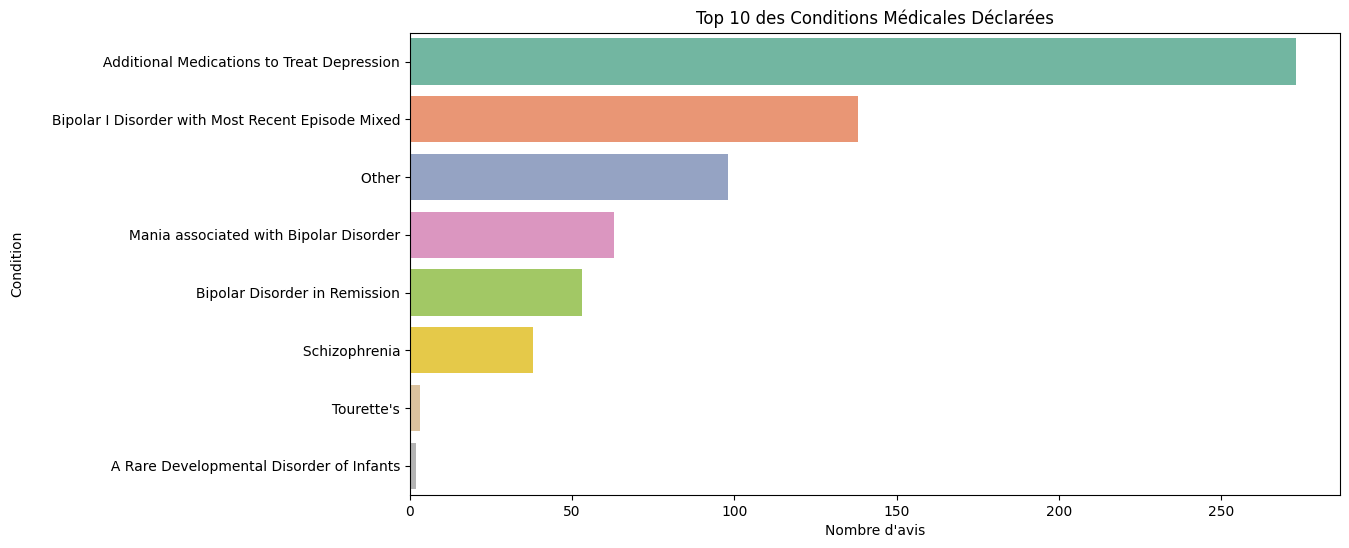

In [93]:
dfNegatif = df[df['sentiment']=='Négatif']
dfNegatif.head()
plt.figure(figsize=(12, 6))
sns.countplot(data=dfNegatif, y=dfNegatif['Condition'], order=dfNegatif['Condition'].value_counts().head(10).index, palette='Set2')
plt.title("Top 10 des Conditions Médicales Déclarées")
plt.xlabel("Nombre d'avis")
plt.ylabel("Condition")
plt.show()

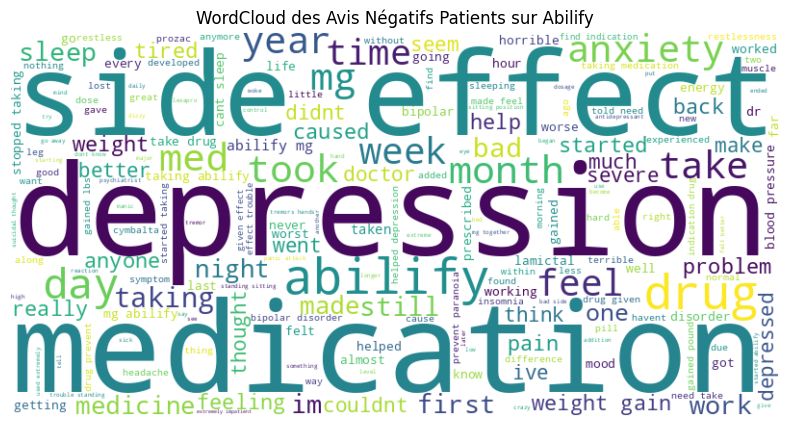

In [104]:
all_words = " ".join(dfNegatif['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud des Avis Négatifs Patients sur Abilify")
plt.show()

<ipython-input-94-04b002c688e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfPositif, y=dfPositif['Condition'], order=dfPositif['Condition'].value_counts().head(10).index, palette='Set2')


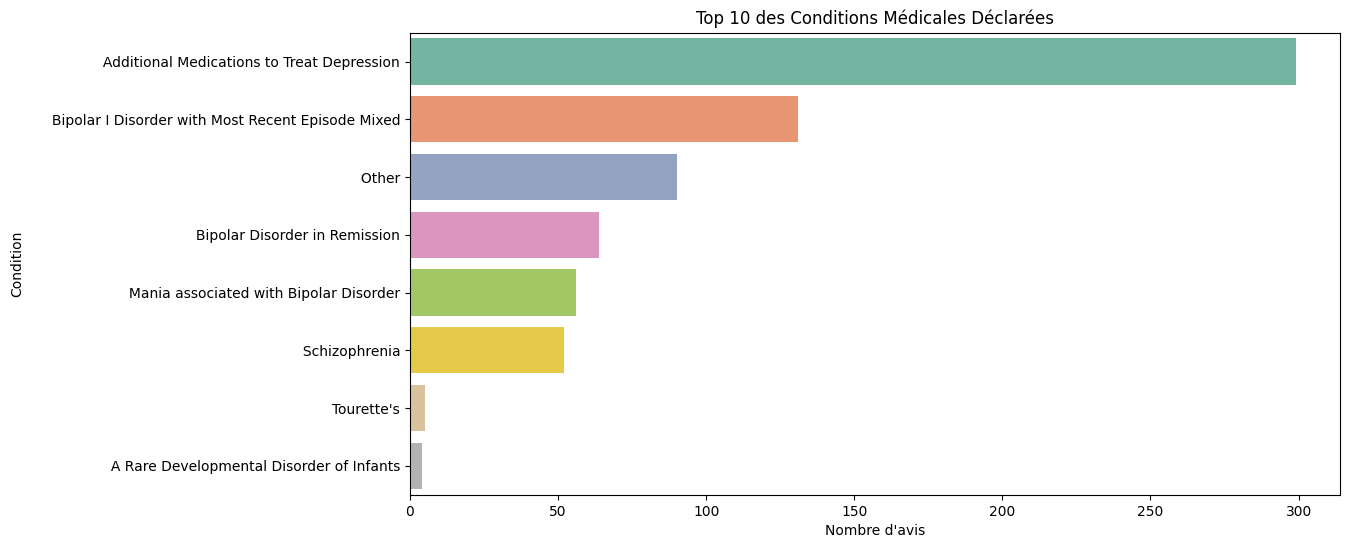

In [94]:
dfPositif = df[df['sentiment']=='Positif']

plt.figure(figsize=(12, 6))
sns.countplot(data=dfPositif, y=dfPositif['Condition'], order=dfPositif['Condition'].value_counts().head(10).index, palette='Set2')
plt.title("Top 10 des Conditions Médicales Déclarées")
plt.xlabel("Nombre d'avis")
plt.ylabel("Condition")
plt.show()

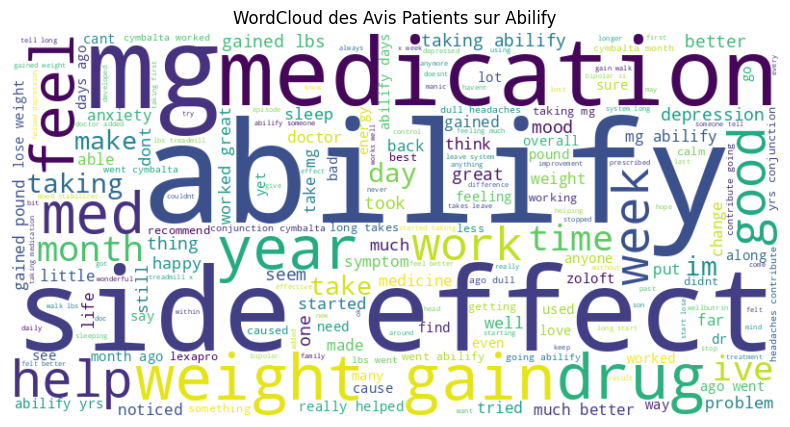

In [105]:
all_words = " ".join(dfPositif['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud des Avis Patients sur Abilify")
plt.show()

In [95]:
df["Gender"].unique()

array(['female', 'male', 'transgender', 'nan', '', 'nonbinary', 'patient',
       'caregiver'], dtype=object)

In [106]:

df.drop(df[df['Gender'].isin(["patient", "caregiver"])].index, inplace=True)

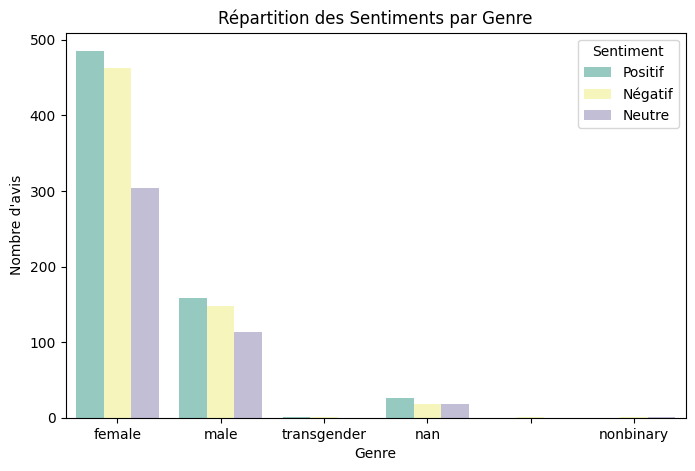

In [107]:
# 📊 Étape 9 : Analyse selon le genre
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='sentiment', palette='Set3')
plt.title("Répartition des Sentiments par Genre")
plt.xlabel("Genre")
plt.ylabel("Nombre d'avis")
plt.legend(title="Sentiment")
plt.show()

In [97]:
df["Age"].value_counts()

,count
Age,
45-54,438
35-44,390
25-34,314
55-64,264
19-24,159
13-18,93
65-74,59
12-Jul,25
75 or over,18


In [98]:

df.drop(df[df['Age'].isin(["12-Jul", "Female    ", "6-Mar", "Male    ", "0-2    ", "Patient"])].index, inplace=True)

In [99]:
df["Age"].unique()

array(['65-74    ', '35-44    ', '25-34    ', '45-54    ', '55-64    ',
       '13-18    ', '19-24    ', '75 or over    ', nan], dtype=object)

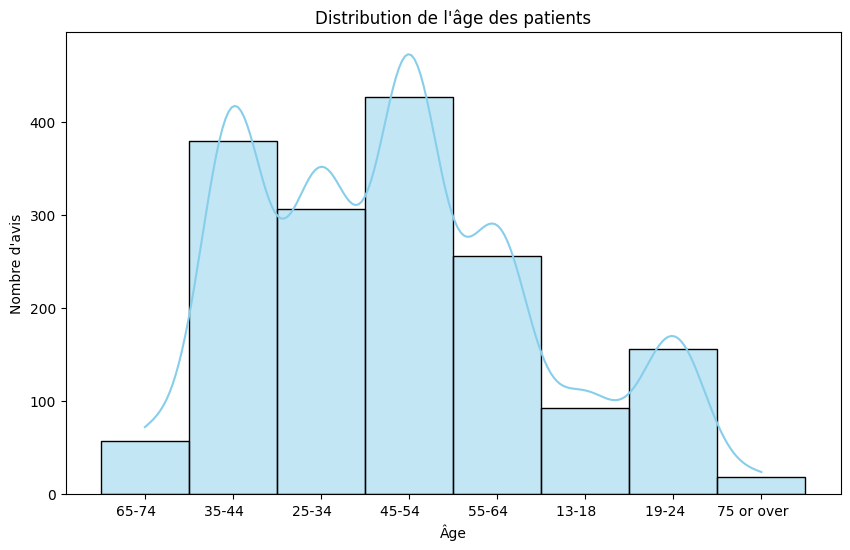

In [108]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de l'âge des patients")
plt.xlabel("Âge")
plt.ylabel("Nombre d'avis")
plt.show()

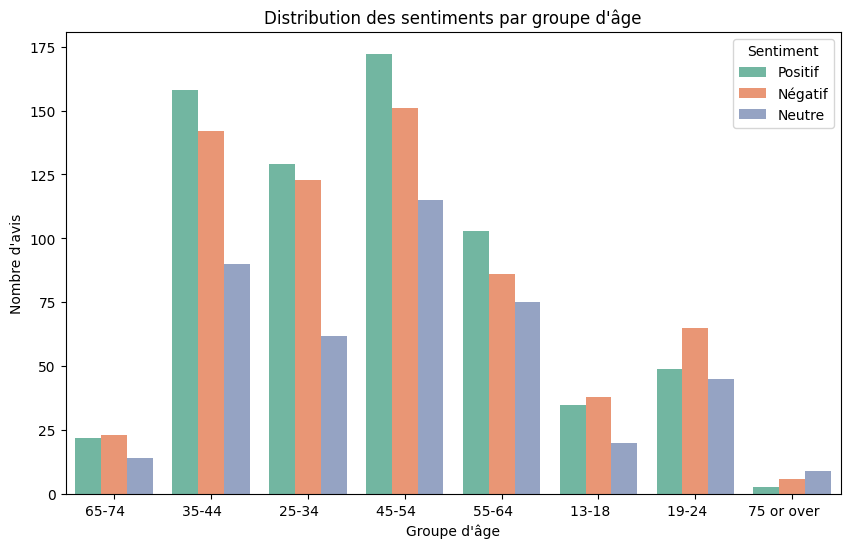

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Age', hue='sentiment', palette='Set2')
plt.title("Distribution des sentiments par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre d'avis")
plt.legend(title="Sentiment")
plt.show()

In [101]:
# 🗨️ Étape 11 : Exemples d'avis extrêmes
positifs = df.sort_values('sentiment_score', ascending=False).head(3)[['description-text', 'sentiment_score']]
negatifs = df.sort_values('sentiment_score').head(3)[['description-text', 'sentiment_score']]

print("\nTop 3 Avis les plus Positifs:\n", positifs)
print("\nTop 3 Avis les plus Négatifs:\n", negatifs)


Top 3 Avis les plus Positifs:
                                        description-text  sentiment_score
1443  I take this with cymbalta, it is absolutely th...           0.9778
1044  Wow!  I am amazed how good I feel.  I take 5 m...           0.9638
1714  Our 6 year okd daughter has been on this for a...           0.9597

Top 3 Avis les plus Négatifs:
                                        description-text  sentiment_score
23    I have Major depression, Bipolar type 2, PTSD,...          -0.9829
633   I was prescribed Abilify to work with my Zolof...          -0.9826
1574  my muscles ached all over, especially in my jo...          -0.9732


In [102]:
list(df.columns)

['Time of Meditation',
 'Suspect name',
 'Age',
 'Gender',
 'Suspect Status',
 'Date',
 'Condition',
 'overall-rating',
 'description-text',
 'clean_review',
 'sentiment_score',
 'sentiment']

In [103]:

# 💾 Étape 12 : Export des données nettoyées
# Pour usage dans Streamlit ou autre visualisation interactive
df[['description-text', 'clean_review', 'sentiment', 'sentiment_score', 'Condition', 'Age', 'Gender']].to_csv("reviews_cleaned.csv", index=False)
